# Case Study 1 : Super Conductor

Submitted by:

- Ravi Sivaraman
- Balaji Avvaru
- Apurv Mittal

Superconductors are materials that conduct electricity with no resistance. This means a superconductor can carry a current indefinitely without losing any energy. However, the superconductors exhibit this property only at a critical temperature. For example: Mercury if cooled below 4.1 Kelvin becomes a super conductor and offers no resistance to electrical current. 

The dataset used for this study provides the list of different superconductors identified with their chemical compositions and the critical temperature. The objective of this study is to predict the critical temperature based on the features extracted for a superconductor. 

The dataset provided has two files  

train.csv which contains 81 features extracted from 21,263 superconductors along with the critical temperature. 

unique_m.csv contains the chemical formula broken up for all the 21,263 superconductors from the train.csv file. 

The code for importing the data is combined with the inital loading of various analysis and visualization packages below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

#### Read and alalyze train csv file

In [2]:
# read train csv files
train_df = pd.read_csv('train.csv')

# critical_temp is part of both csv files drop critical_temp from train dataframe
train_df.drop(['critical_temp'], inplace=True, axis=1)

In [3]:
train_orin_df = pd.read_csv('train.csv')
train_orin_df.drop(['critical_temp'], inplace=True, axis=1)

In [4]:
train_df.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.248990             0.966676   
50%            66.361592              39.918385             1.199541   
75%            78.116681              73.113234             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21263.000000       21263.000000           21263.000000   
mean                  1.063884         115.601251              33.225218   
std                   0.401423          54.626887              26.967752   
min                   0.000000           0.000000               0.000000   
25%                   0.775363          78.512902              16.824174   
50%                   1.146783         122.906070              26.636008   
75%                   1.359418         154.119320              38.356908   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...  mean_Valence  wtd_mean_Valence  gmean_Valence  \
count     21263.000000  ...  21263.000000      21263.000000   21263.000000   
mean         44.391893  ...      3.198228          3.153127       3.056536   
std          20.035430  ...      1.044611          1.191249       1.046257   
min           0.000000  ...      1.000000          1.000000       1.000000   
25%          32.890369  ...      2.333333          2.116732       2.279705   
50%          45.123500  ...      2.833333          2.618182       2.615321   
75%          59.322812  ...      4.000000          4.026201       3.727919   
max         101.019700  ...      7.000000          7.000000       7.000000   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
count       21263.000000     21263.000000         21263.000000   21263.000000   
mean            3.055885         1.295682             1.052841       2.041010   
std             1.174815         0.393155             0.380291       1.242345   
min             1.000000         0.000000             0.000000       0.000000   
25%             2.091251         1.060857             0.775678       1.000000   
50%             2.434057         1.368922             1.166532       2.000000   
75%             3.914868         1.589027             1.330801       3.000000   
max             7.000000         2.141963             1.949739       6.000000   

       wtd_range_Valence   std_Valence  wtd_std_Valence  
count       21263.000000  21263.000000     21263.000000  
mean            1.483007      0.839342         0.673987  
std             0.978176      0.484676         0.455580  
min             0.000000      0.000000         0.000000  
25%             0.921454      0.451754         0.306892  
50%             1.063077      0.800000         0.500000  
75%             1.918400      1.200000         1.020436  
max             6.992200      3.000000         3.000000  

[8 rows x 81 columns]

In [5]:
# Validate null values in train csv file
train_df.isnull().sum().sum()

0

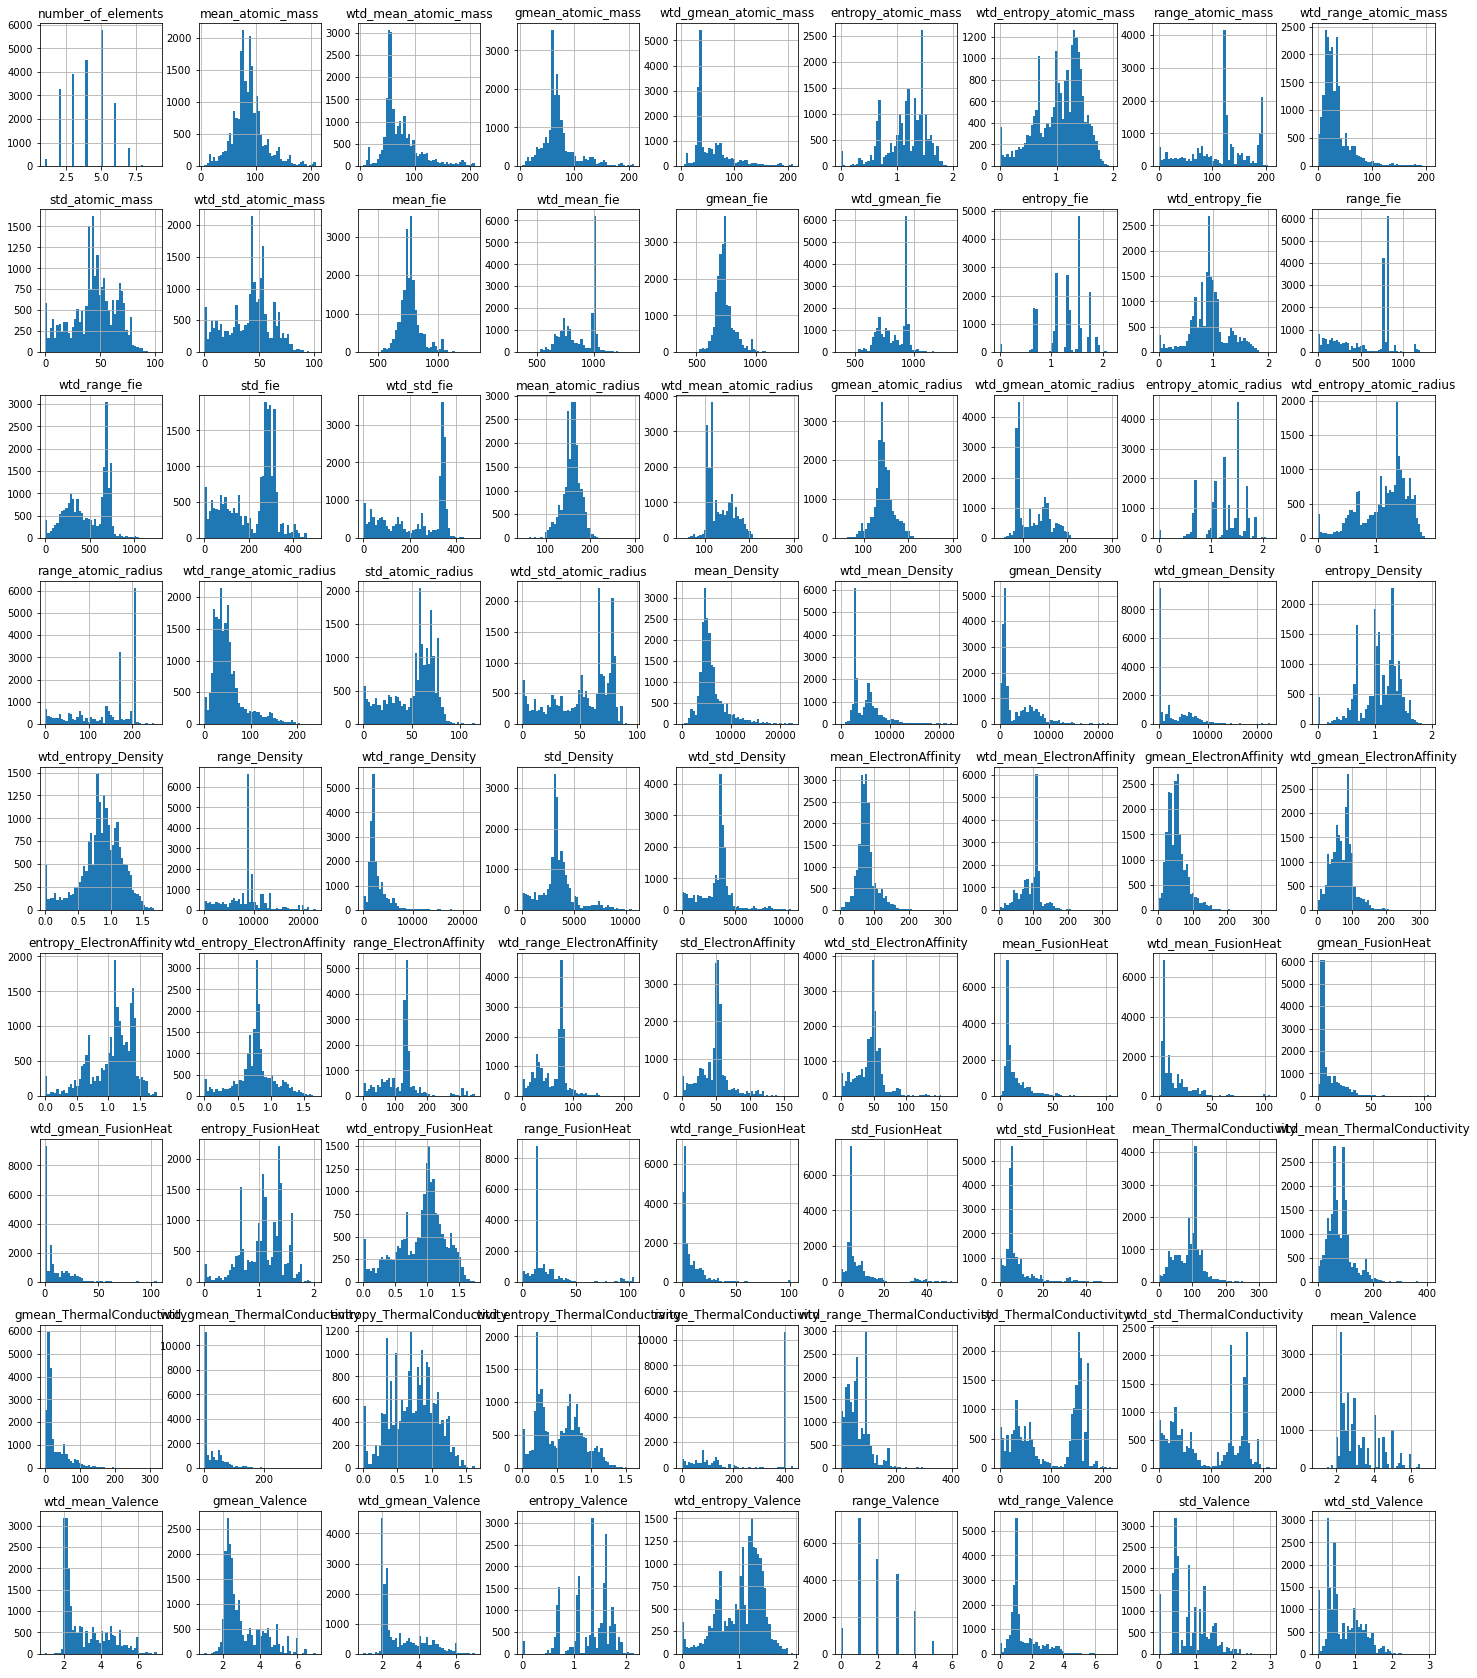

In [6]:
#Visualizing the hist of data to check normality of independent variable
train_df.hist(bins=50,figsize=(25,30))
plt.show()

In [7]:
# variables which are not normally distributed and captured the duplicate information
non_normal_var = ['range_atomic_mass', 'wtd_range_atomic_mass', 'wtd_mean_fie', 'range_fie', 'wtd_std_fie', 'wtd_mean_atomic_radius',
                  'range_atomic_radius', 'wtd_mean_Density', 'gmean_Density', 'range_Density', 'wtd_std_Density', 'range_ElectronAffinity',
                  'range_FusionHeat', 'wtd_gmean_ThermalConductivity', 'range_ThermalConductivity']

# Removing not normal variables from dataframe
train_df.drop(non_normal_var, inplace=True, axis=1)

In [8]:
#https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
# to drop features with colliniarity more than 95%
pd.set_option('display.max_rows', 100)

corr_df = pd.DataFrame(train_df.corr().abs())
corr_df.head(100)

number_of_elements  mean_atomic_mass  \
number_of_elements                         1.000000          0.141923   
mean_atomic_mass                           0.141923          1.000000   
wtd_mean_atomic_mass                       0.353064          0.815977   
gmean_atomic_mass                          0.292969          0.940298   
wtd_gmean_atomic_mass                      0.454525          0.745841   
entropy_atomic_mass                        0.939304          0.104000   
wtd_entropy_atomic_mass                    0.881845          0.097609   
std_atomic_mass                            0.513998          0.196460   
wtd_std_atomic_mass                        0.546391          0.130675   
mean_fie                                   0.167451          0.285782   
gmean_fie                                  0.024229          0.240565   
wtd_gmean_fie                              0.424152          0.219381   
entropy_fie                                0.973195          0.166935   
wtd_entropy_fie                            0.719209          0.163565   
wtd_range_fie                              0.329624          0.080545   
std_fie                                    0.674005          0.276561   
mean_atomic_radius                         0.001389          0.497664   
gmean_atomic_radius                        0.240444          0.561061   
wtd_gmean_atomic_radius                    0.518256          0.359894   
entropy_atomic_radius                      0.972245          0.140034   
wtd_entropy_atomic_radius                  0.904121          0.147604   
wtd_range_atomic_radius                    0.371350          0.141100   
std_atomic_radius                          0.624810          0.326403   
wtd_std_atomic_radius                      0.695089          0.280440   
mean_Density                               0.418675          0.756861   
wtd_gmean_Density                          0.649882          0.525588   
entropy_Density                            0.871832          0.043416   
wtd_entropy_Density                        0.767078          0.026325   
wtd_range_Density                          0.355389          0.342391   
std_Density                                0.210724          0.245042   
mean_ElectronAffinity                      0.119303          0.088230   
wtd_mean_ElectronAffinity                  0.195608          0.061103   
gmean_ElectronAffinity                     0.356067          0.189282   
wtd_gmean_ElectronAffinity                 0.052884          0.134382   
entropy_ElectronAffinity                   0.877304          0.091539   
wtd_entropy_ElectronAffinity               0.625798          0.107651   
wtd_range_ElectronAffinity                 0.241411          0.010235   
std_ElectronAffinity                       0.423738          0.164960   
wtd_std_ElectronAffinity                   0.480813          0.133101   
mean_FusionHeat                            0.437624          0.137669   
wtd_mean_FusionHeat                        0.449272          0.135429   
gmean_FusionHeat                           0.514252          0.014818   
wtd_gmean_FusionHeat                       0.519109          0.043003   
entropy_FusionHeat                         0.900759          0.008499   
wtd_entropy_FusionHeat                     0.860479          0.028541   
wtd_range_FusionHeat                       0.371788          0.167528   
std_FusionHeat                             0.113361          0.337969   
wtd_std_FusionHeat                         0.074796          0.335778   
mean_ThermalConductivity                   0.227656          0.158266   
wtd_mean_ThermalConductivity               0.206069          0.065989   
gmean_ThermalConductivity                  0.485324          0.006004   
entropy_ThermalConductivity                0.501871          0.100077   
wtd_entropy_ThermalConductivity            0.207065          0.098221   
wtd_range_ThermalConductivity              0.316772          0.027790   
std_ThermalConduct

In [9]:
# Multi Colliniarity analysis on Independent variables 
upper_tri = corr_df.where(np.triu(np.ones(corr_df.shape),k=1).astype(np.bool))
print(upper_tri)

                                 number_of_elements  mean_atomic_mass  \
number_of_elements                              NaN          0.141923   
mean_atomic_mass                                NaN               NaN   
wtd_mean_atomic_mass                            NaN               NaN   
gmean_atomic_mass                               NaN               NaN   
wtd_gmean_atomic_mass                           NaN               NaN   
entropy_atomic_mass                             NaN               NaN   
wtd_entropy_atomic_mass                         NaN               NaN   
std_atomic_mass                                 NaN               NaN   
wtd_std_atomic_mass                             NaN               NaN   
mean_fie                                        NaN               NaN   
gmean_fie                                       NaN               NaN   
wtd_gmean_fie                                   NaN               NaN   
entropy_fie                                     NaN

In [10]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print((to_drop))


['wtd_gmean_atomic_mass', 'gmean_fie', 'entropy_fie', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'wtd_gmean_FusionHeat', 'wtd_std_ThermalConductivity', 'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence', 'std_Valence']


In [11]:
# drop variables which are collinear to each other 

train_df_cleaned = train_df.drop(to_drop, axis=1)
train_df_cleaned.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  entropy_atomic_mass  wtd_entropy_atomic_mass  \
0          66.361592             1.181795                 1.062396   
1          73.132787             1.449309                 1.057755   
2          66.361592             1.181795                 0.975980   
3          66.361592             1.181795                 1.022291   
4          66.361592             1.181795                 1.129224   

   std_atomic_mass  wtd_std_atomic_mass  mean_fie  wtd_gmean_fie  ...  \
0        51.968828            53.622535   775.425     938.016780  ...   
1        47.094633            53.979870   766.440     938.745413  ...   
2        51.968828            53.656268   775.425     939.009036  ...   
3        51.968828            53.639405   775.425     938.512777  ...   
4        51.968828            53.588771   775.425     937.025573  ...   

   gmean_ThermalConductivity  entropy_ThermalConductivity  \
0                   7.062488                     0.308148   
1                  16.064228                     0.847404   
2                   7.062488                     0.308148   
3                   7.062488                     0.308148   
4                   7.062488                     0.308148   

   wtd_entropy_ThermalConductivity  wtd_range_ThermalConductivity  \
0                         0.262848                      57.127669   
1                         0.567706                      51.413383   
2                         0.250477                      57.127669   
3                         0.257045                      57.127669   
4                         0.272820                      57.127669   

   std_ThermalConductivity  mean_Valence  wtd_mean_Valence  range_Valence  \
0               168.854244          2.25          2.257143              1   
1               198.554600          2.00          2.257143              2   
2               168.854244          2.25          2.271429              1   
3               168.854244          2.25          2.264286              1   
4               168.854244          2.25          2.242857              1   

   wtd_range_Valence  wtd_std_Valence  
0           1.085714         0.437059  
1           1.128571         0.468606  
2           1.114286         0.444697  
3           1.100000         0.440952  
4           1.057143         0.428809  

[5 rows x 54 columns]

Text(0.5, 1.0, 'HeatMap-Correlation Matrix')

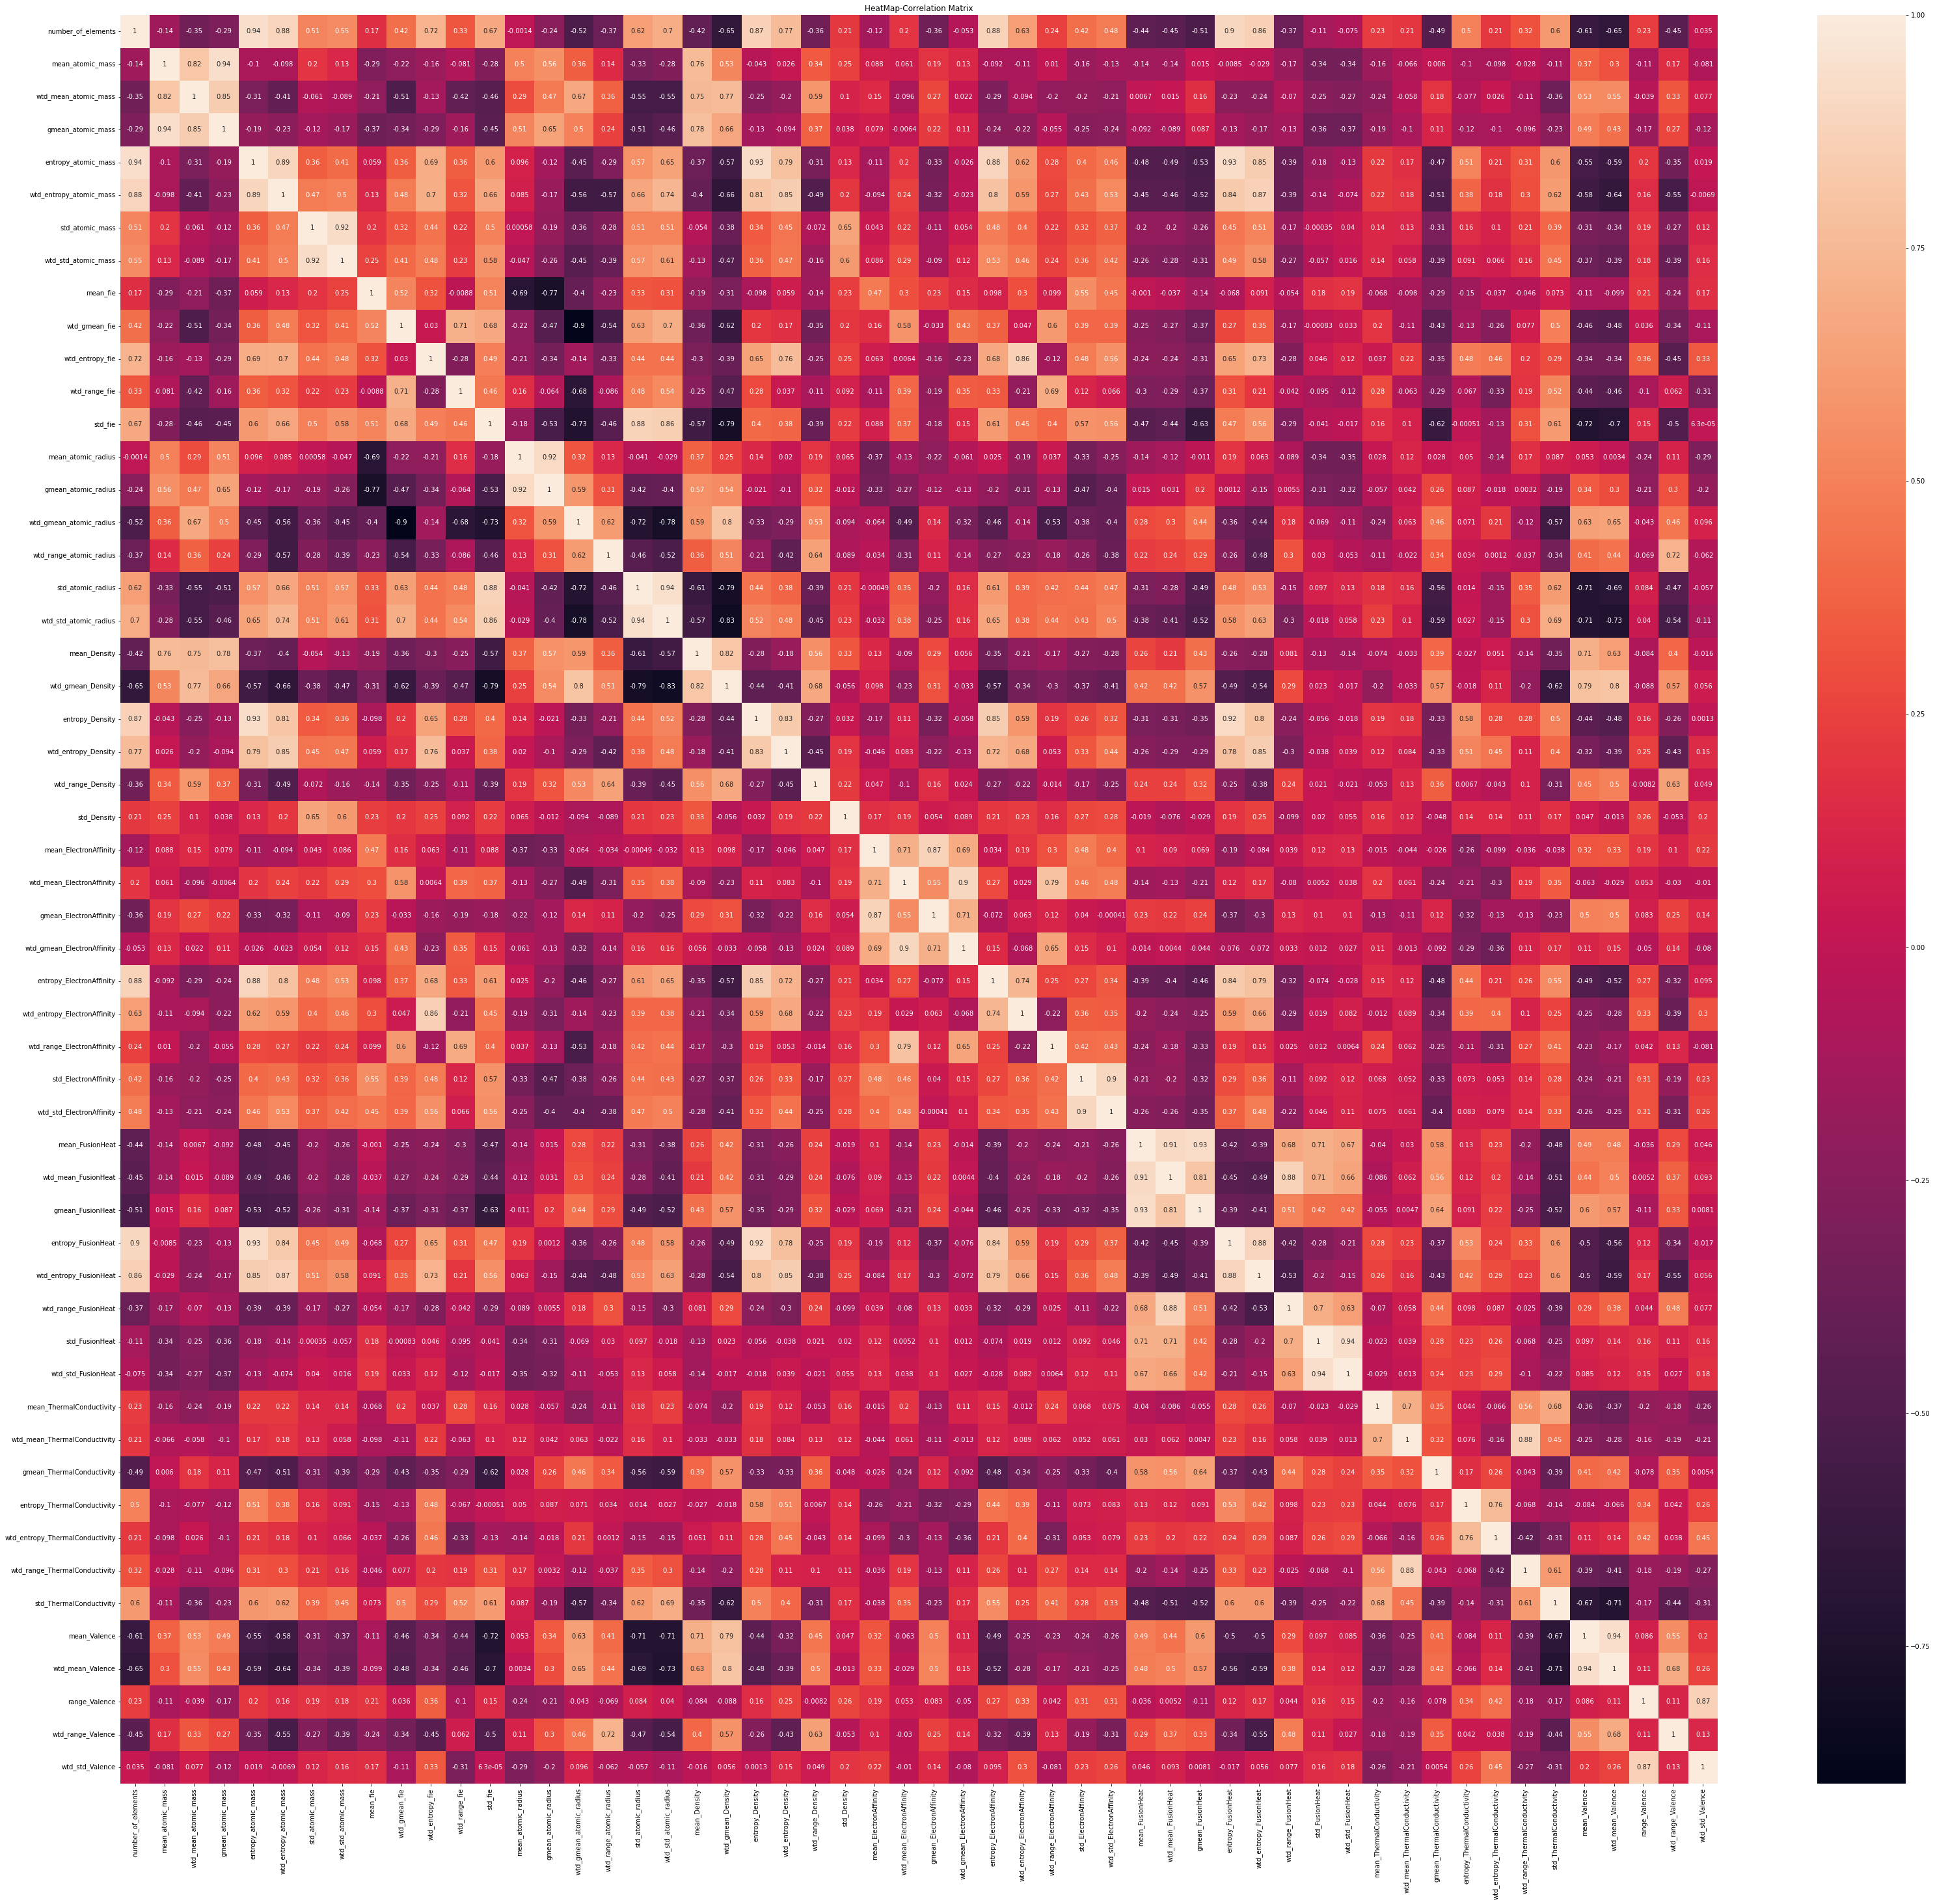

In [12]:
#heatmap - correlation matrix
plt.figure(figsize=(55, 50)) #code reference (5-1)
sns.heatmap(train_df_cleaned.corr(), annot=True)
plt.title('HeatMap-Correlation Matrix')

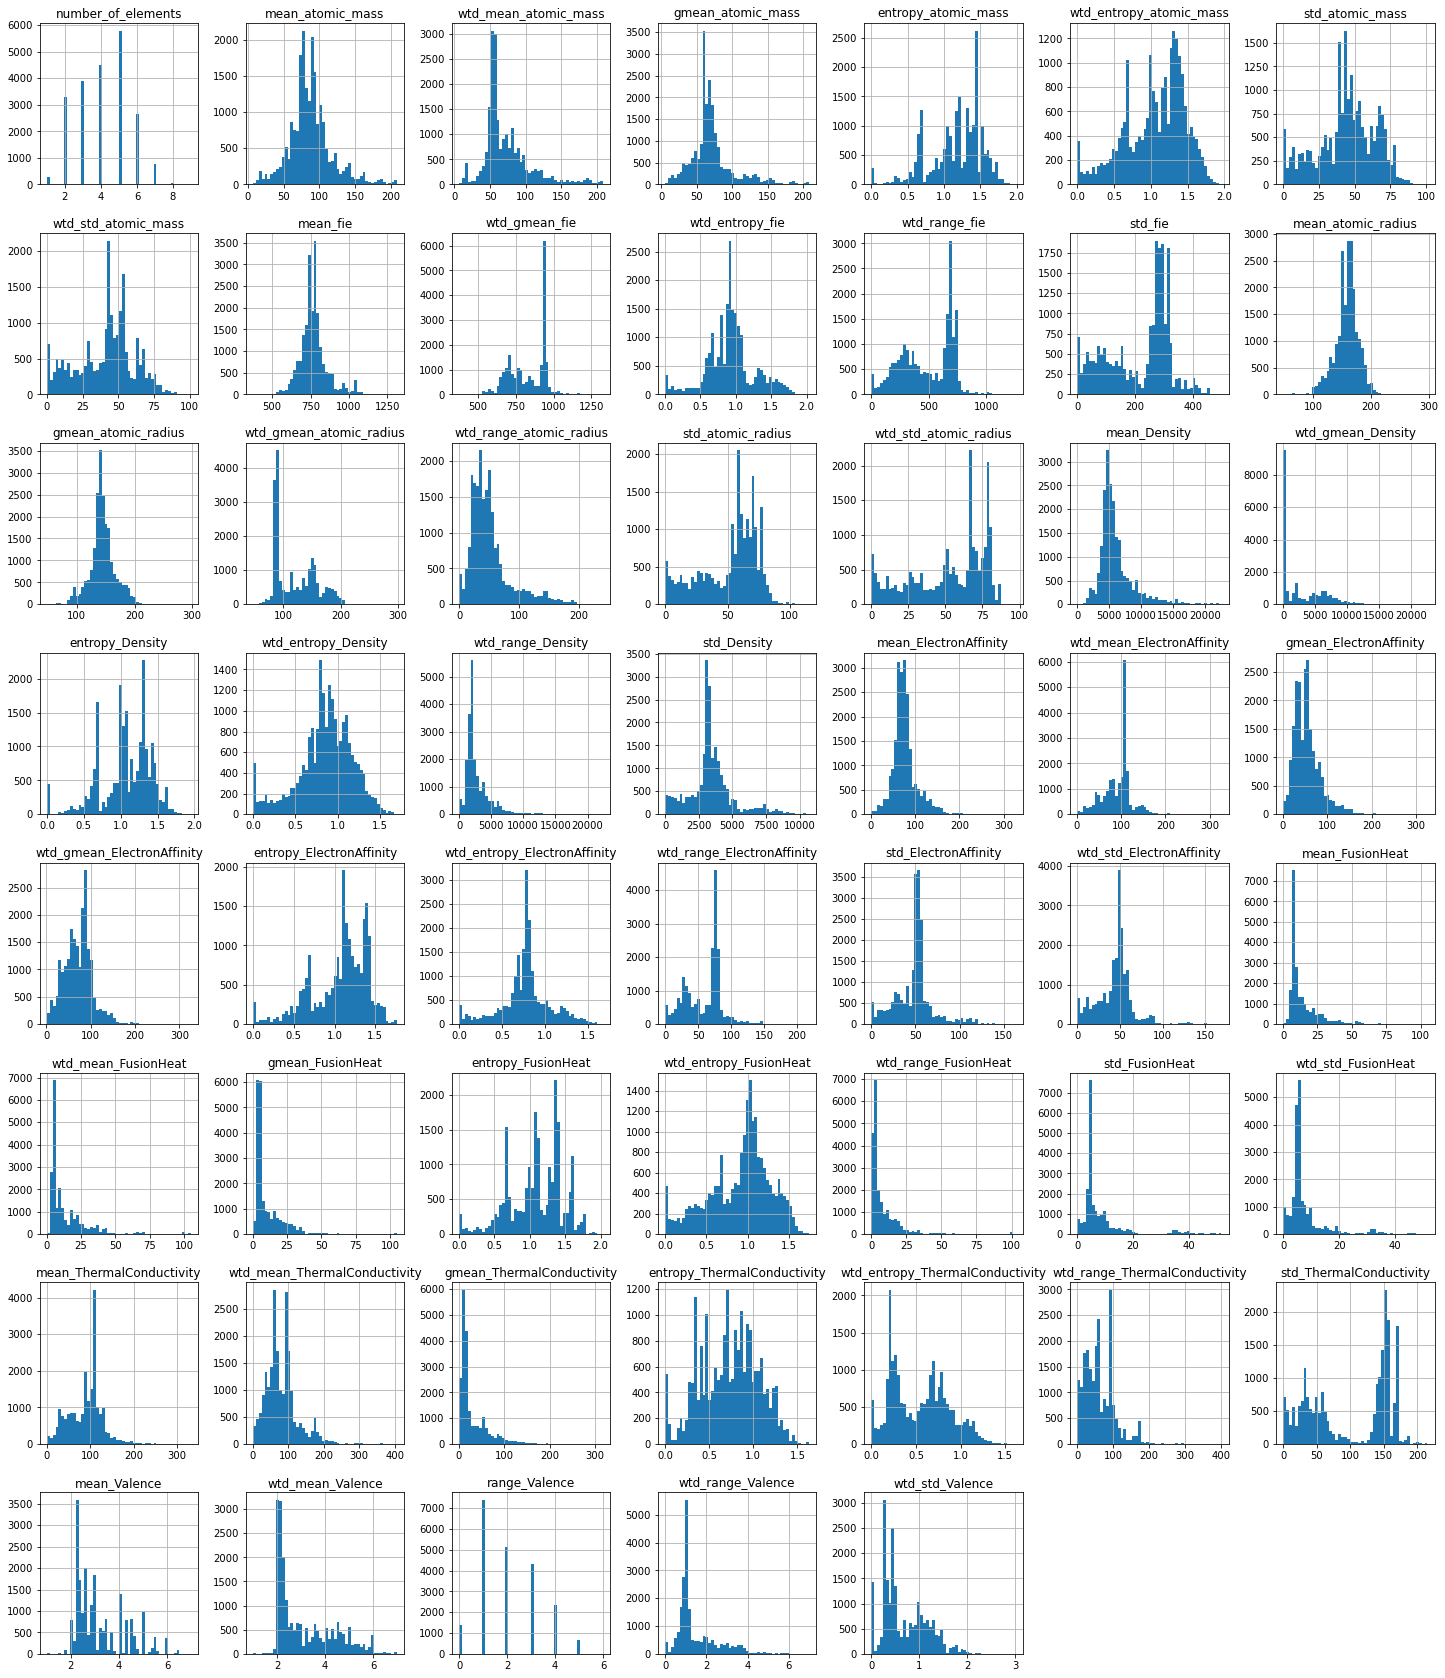

In [13]:
#Visualizing the hist of data
train_df_cleaned.hist(bins=50,figsize=(25,30))
plt.show()

#### Read and analyze unique_m csv file

In [14]:
# read unique_m csv files
unique_m_df = pd.read_csv('unique_m.csv')

The "material" column which comprises of all elements used as materials, it is not useful to us so we will drop it from our data frame. This will also help to reduce the size of any pairwise comparisons without additional restricting.

In [15]:
unique_m_df.drop(['material'], inplace=True, axis=1)
unique_m_df.head()

H  He   Li   Be    B    C    N    O    F  Ne  ...   Pt   Au   Hg   Tl  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Pb   Bi  Po  At  Rn  critical_temp  
0  0.0  0.0   0   0   0           29.0  
1  0.0  0.0   0   0   0           26.0  
2  0.0  0.0   0   0   0           19.0  
3  0.0  0.0   0   0   0           22.0  
4  0.0  0.0   0   0   0           23.0  

[5 rows x 87 columns]

In [16]:
# Validate null values in unique_m csv file
unique_m_df.isnull().sum().sum()

0

In [17]:
# Passing a value of zero for the parameter will filter all the features with zero variance.
constant_filter = VarianceThreshold(threshold=0)

# apply this filter to our dataframe
constant_filter.fit(unique_m_df)

# get_support() method will give the number of non-constant features.
len(unique_m_df.columns[constant_filter.get_support()])

# get columns names of non constant columns
non_constant_columns = [column for column in unique_m_df.columns
                    if column in unique_m_df.columns[constant_filter.get_support()]]

print(len(non_constant_columns))

unique_m_df_cleaned = pd.DataFrame(constant_filter.transform(unique_m_df), columns=non_constant_columns)
unique_m_df_cleaned.shape

78


(21263, 78)

In [18]:
# get columns names of non constant columns
constant_columns = [column for column in unique_m_df.columns
                    if not column in unique_m_df.columns[constant_filter.get_support()]]

print(len(constant_columns))
print(constant_columns)

9
['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn']


Text(0.5, 1.0, 'HeatMap-Correlation Matrix')

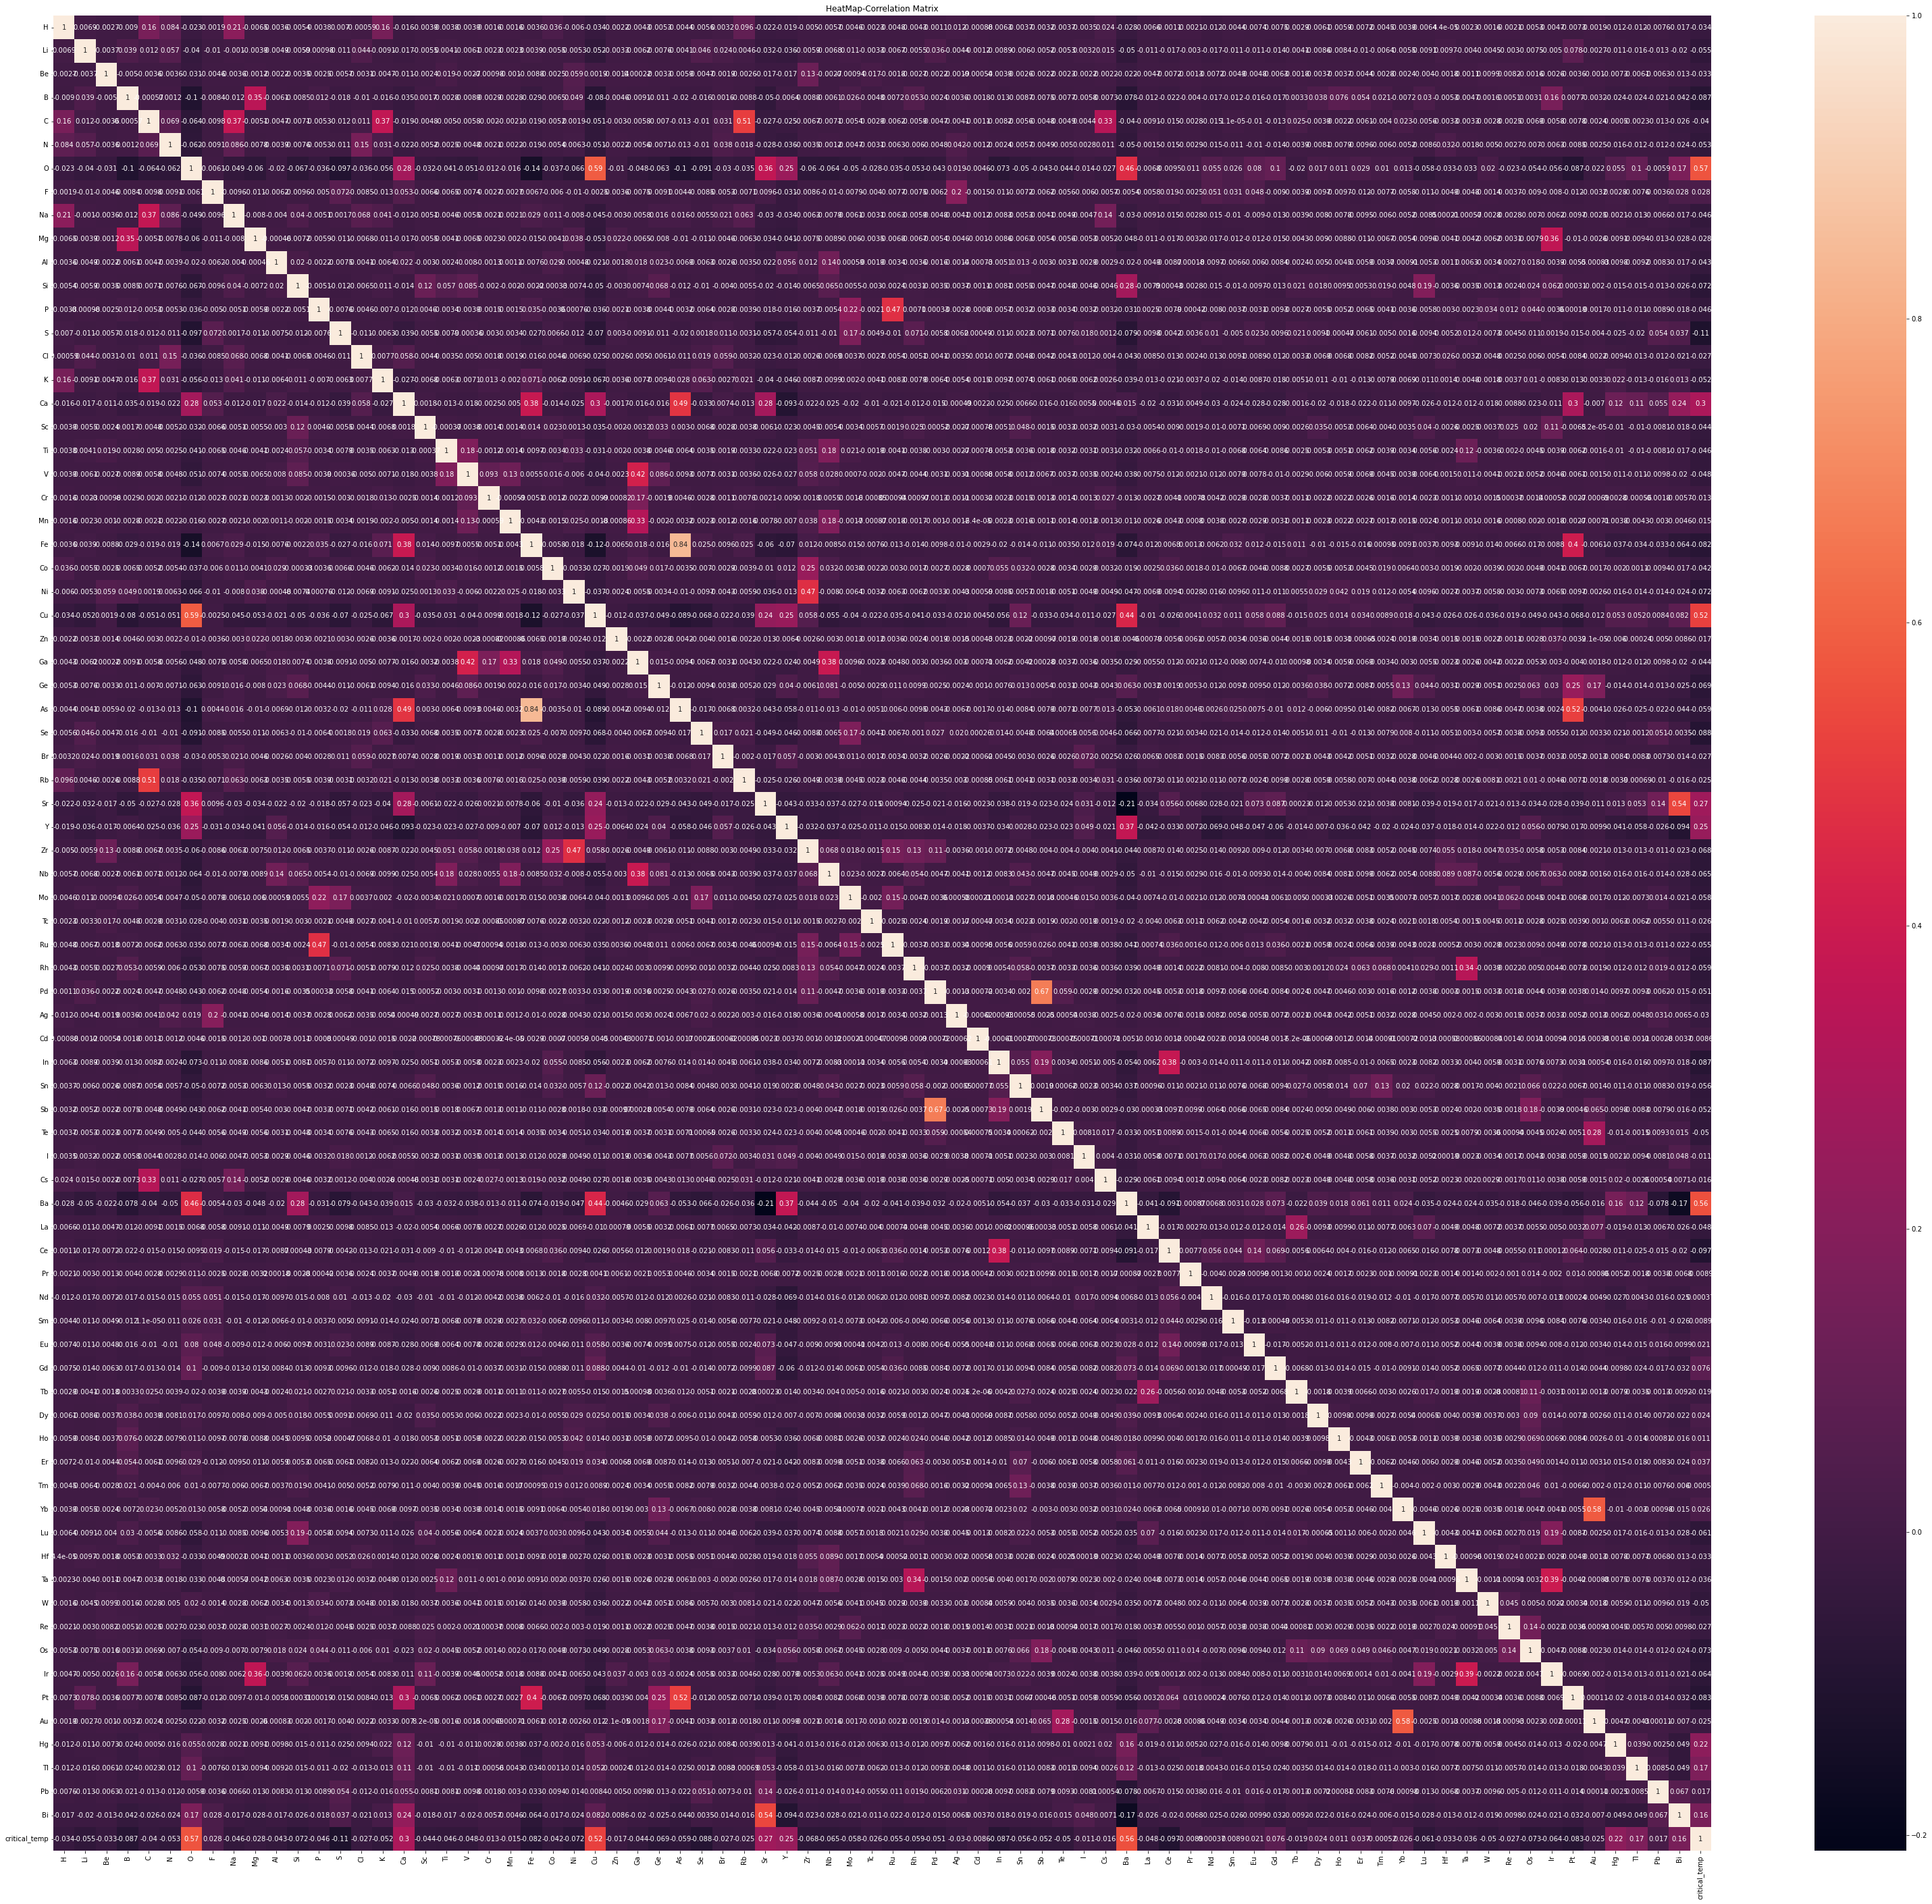

In [19]:
#heatmap - correlation matrix
plt.figure(figsize=(55, 50)) #code reference (5-1)
sns.heatmap(unique_m_df_cleaned.corr(), annot=True)
plt.title('HeatMap-Correlation Matrix')

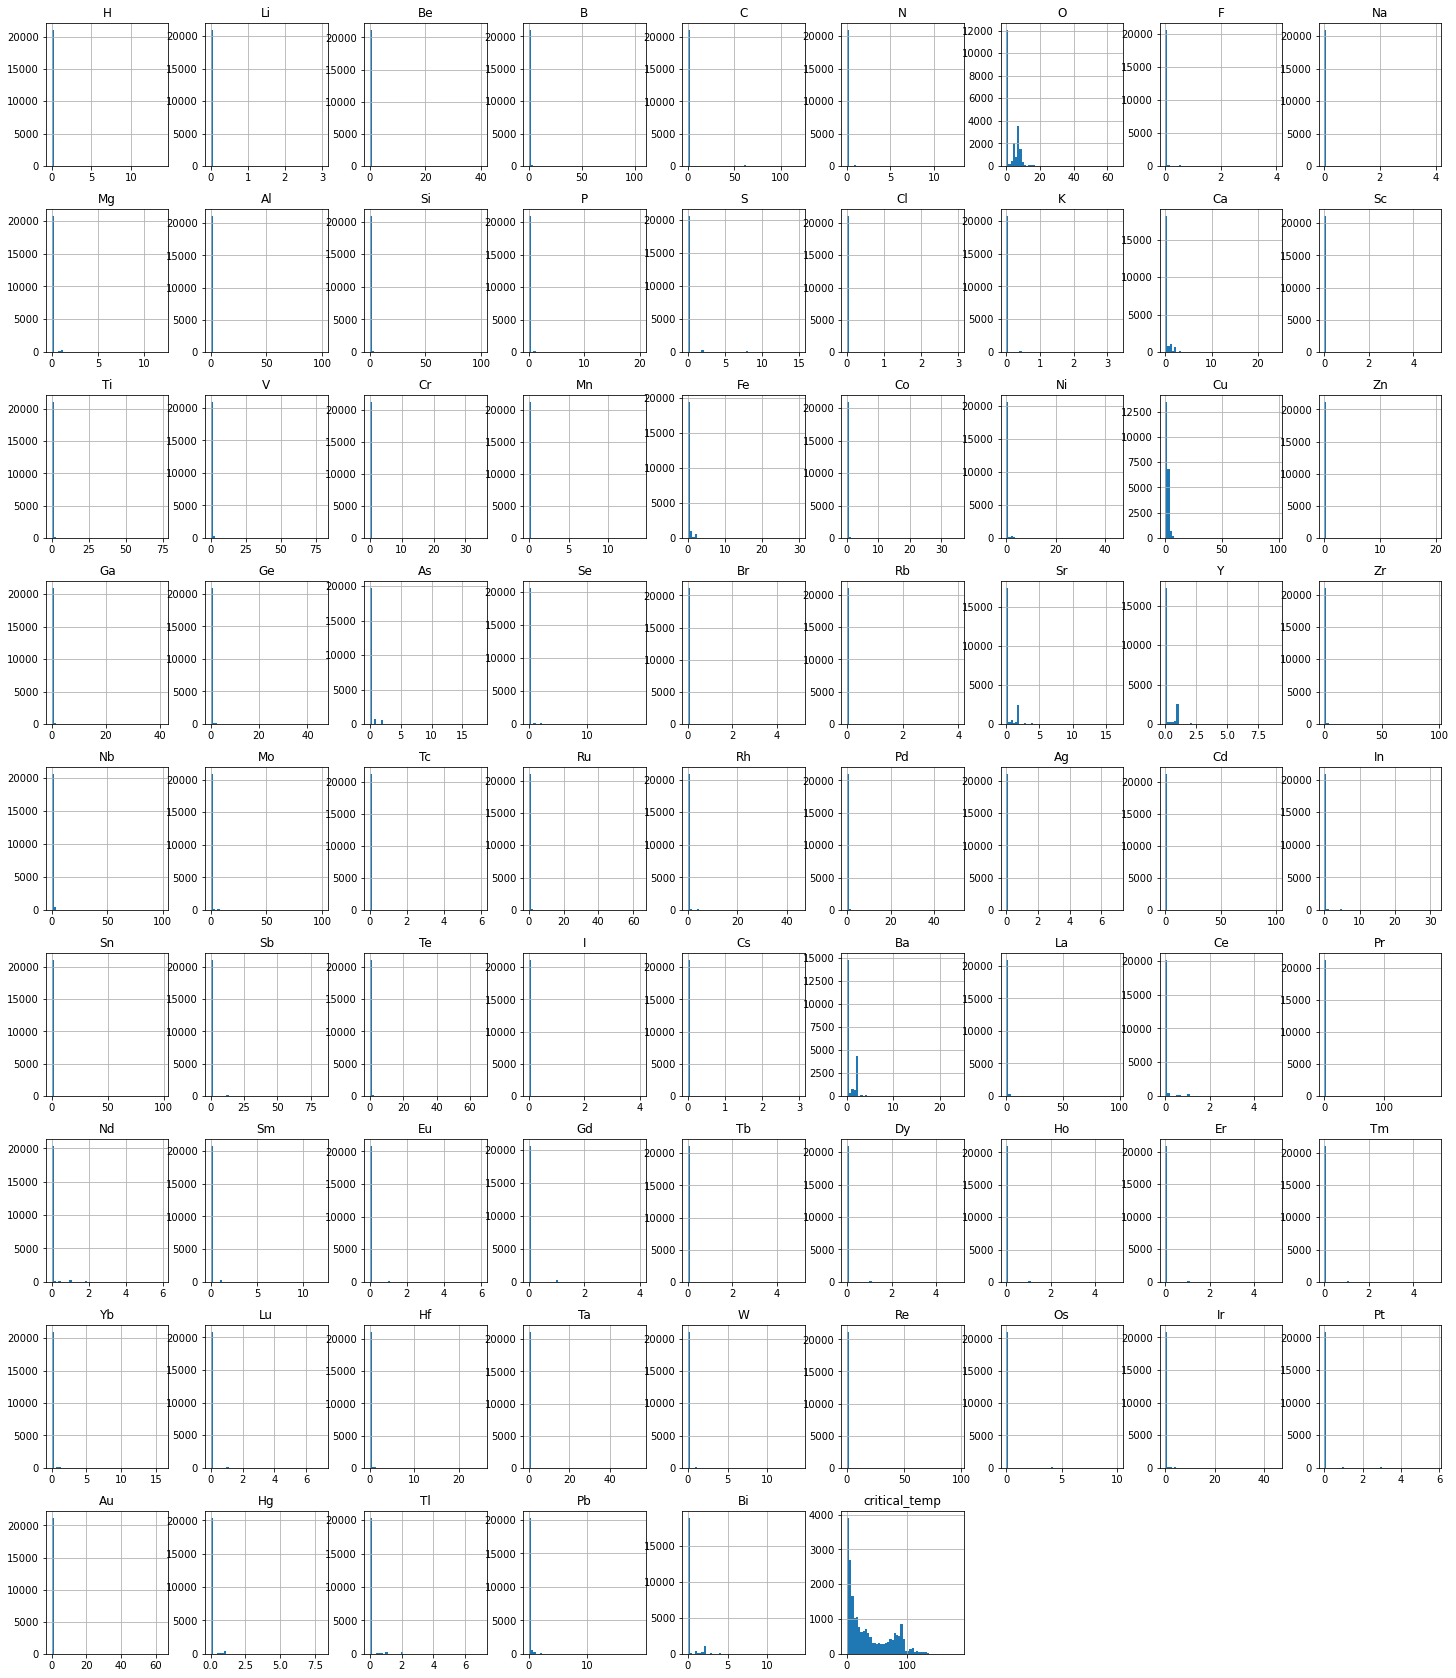

In [20]:
#Visualizing the hist of data
unique_m_df_cleaned.hist(bins=50,figsize=(25,30))
plt.show()

Most of the columns in unique_m data frame having value ZERO for most of the observations which is the reason for high multicollinearity among independent features

#### Concatenate both csv files

In [21]:
df = pd.concat([train_df_cleaned,unique_m_df_cleaned],axis=1)
df.shape

(21263, 132)

In [22]:
#data frame with all variables
df_all = pd.concat([train_orin_df,unique_m_df],axis=1)
df_all.shape

(21263, 168)

In [23]:
# Create X (Independent variables) and y(target) from the dataframe with reduced variables
X = df.drop(['critical_temp'],axis=1)
ind_columns = df.drop('critical_temp',axis=1).columns
y = df['critical_temp']

In [24]:
# Create X (Independent variables) and y(target) from the dataframe with all variables
X_all = df_all.drop(['critical_temp'],axis=1)
ind_columns_all = df_all.drop('critical_temp',axis=1).columns
y_all = df_all['critical_temp']

In [25]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Normalize the data (for all variables)
X_all_scaled = scaler.fit_transform(X_all)

In [27]:
# cross validation with k=10
cv = KFold(n_splits=10, random_state=1234, shuffle=True)

#### Multiple Linear Regression

#### Method - 1 (dataset with all variable)

In [28]:
# Regression Model
mlr_all = linear_model.LinearRegression().fit(X_all_scaled, y_all)
# score the regression model based on Root Mean Squared Error
mlr_all_preds = cross_val_predict(mlr_all, X_all_scaled, y_all, cv=cv)
mlr_all_scores = cross_val_score(mlr_all, X_all_scaled, y_all, scoring='neg_root_mean_squared_error', cv=cv)
print('Average of RMSE for 10 folds: ', np.mean(mlr_all_scores))
print('Standard Deviation of RMSE for 10 folds: ', np.std(mlr_all_scores))

Average of RMSE for 10 folds:  -22.567912627438222
Standard Deviation of RMSE for 10 folds:  12.42901305546248


In [29]:
mlr_all_scores

array([-16.66222827, -17.09389124, -16.916193  , -16.61280737,
       -16.51606893, -36.6341099 , -16.51435072, -16.97374952,
       -16.43790687, -55.31782046])

Some of the observations in 7th and 10th folds are not same as most of the observations, which is causing high RMSE in those two folds.  

#### Method - 2 (dataset with reduced variables)

In [30]:
# Regression Model
mlr = linear_model.LinearRegression().fit(X_scaled, y)
# score the regression model based on Root Mean Squared Error
mlr_preds = cross_val_predict(mlr, X_scaled, y, cv=cv)
mlr_scores = cross_val_score(mlr, X_scaled, y, scoring='neg_root_mean_squared_error', cv=cv)
print('Average of RMSE for 10 folds: ', np.mean(mlr_scores))
print('Standard Deviation of RMSE for 10 folds: ', np.std(mlr_scores))

Average of RMSE for 10 folds:  -22.67985342685359
Standard Deviation of RMSE for 10 folds:  10.941256856189279


In [31]:
mlr_scores

array([-17.11372273, -17.75714692, -17.50256374, -17.31075339,
       -17.2494668 , -38.71287444, -17.22180329, -17.69255286,
       -16.88444786, -49.35320223])

With respect to RMSE Linear regression model with all variables is little less than RMSE with reduced variables. But standard deviation is more with all variables than reduced variables. Plot the residuals with reduced variables

<Figure size 864x576 with 0 Axes>

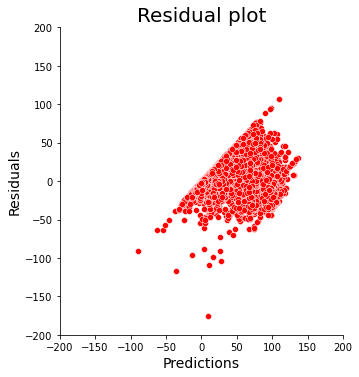

In [32]:
rezdf = df
rezdf['preds'] = mlr_preds
rezdf['resids'] = (rezdf['preds'] - y)

# residual plot
fig = plt.figure(figsize = (12, 8))
sns.relplot(x='preds', y='resids', data=rezdf, color='red')
plt.title('Residual plot', size=20)
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.xlabel('Predictions', size=14)
plt.ylabel('Residuals', size=14);

(-200.0, 200.0)

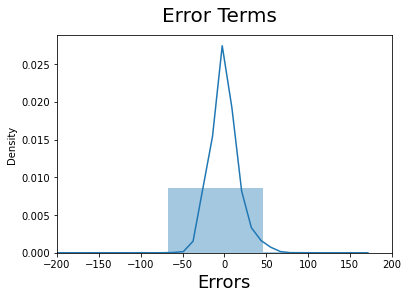

In [33]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(rezdf['resids'], bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.xlim([-200, 200])

In [34]:
# intercept and regression model coefficients
coef2 = mlr.coef_.tolist()
coefdf2 = pd.DataFrame(ind_columns, columns=['Variable'])
coefdf2['Coefficient'] = coef2

print('Intercept: \n', mlr.intercept_)
coefdf2

Intercept: 
 34.421219135352445


Variable  Coefficient
0      number_of_elements     1.972091
1        mean_atomic_mass     7.769634
2    wtd_mean_atomic_mass    -7.277440
3       gmean_atomic_mass    -0.923948
4     entropy_atomic_mass    -9.686440
..                    ...          ...
126                    Au    -0.528809
127                    Hg     1.048743
128                    Tl     1.434886
129                    Pb     0.385434
130                    Bi     4.914820

[131 rows x 2 columns]

#### LASSO Regression

#### Method - 1 (Dataset with all variables)

In [35]:
# hyperparameter tuning with grid search
lasso_all_reg = Lasso()
param_grid = {'alpha':[0.001, 0.005,  0.01, 0.03,  0.1, 0.3, 0.6, 1]}
grid_search_lasso_all = GridSearchCV(estimator=lasso_all_reg, param_grid=param_grid, n_jobs=-1, 
                                     cv=cv, scoring='neg_root_mean_squared_error')


In [36]:
%%time
grid_result_lasso_all = grid_search_lasso_all.fit(X_all_scaled, y_all)
# summarize results
print("Best: %f using %s" % (grid_result_lasso_all.best_score_, grid_result_lasso_all.best_params_))
means_all = grid_result_lasso_all.cv_results_['mean_test_score']
stds_all = grid_result_lasso_all.cv_results_['std_test_score']
params_all = grid_result_lasso_all.cv_results_['params']
for mean, stdev, param in zip(means_all, stds_all, params_all):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -17.957879 using {'alpha': 0.3}
-22.231906 (11.430279) with: {'alpha': 0.001}
-21.851813 (10.649407) with: {'alpha': 0.005}
-21.482859 (9.857907) with: {'alpha': 0.01}
-20.563842 (7.779756) with: {'alpha': 0.03}
-18.608007 (3.511564) with: {'alpha': 0.1}
-17.957879 (0.284759) with: {'alpha': 0.3}
-18.495503 (0.267034) with: {'alpha': 0.6}
-19.006189 (0.254651) with: {'alpha': 1}
Wall time: 1min 26s


#### Method - 2 (Reduced dataset)

In [37]:
# hyperparameter tuning with grid search
lasso_reg = Lasso()
grid_search_lasso = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, n_jobs=-1, 
                                 cv=cv, scoring='neg_root_mean_squared_error')


In [38]:
%%time
grid_result_lasso = grid_search_lasso.fit(X_scaled, y)
# summarize results
print("Best: %f using %s" % (grid_result_lasso.best_score_, grid_result_lasso.best_params_))
means = grid_result_lasso.cv_results_['mean_test_score']
stds = grid_result_lasso.cv_results_['std_test_score']
params = grid_result_lasso.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.345913 using {'alpha': 0.3}
-22.553782 (10.699814) with: {'alpha': 0.001}
-22.221466 (10.110054) with: {'alpha': 0.005}
-21.834902 (9.429106) with: {'alpha': 0.01}
-20.662639 (7.582365) with: {'alpha': 0.03}
-19.177542 (4.434427) with: {'alpha': 0.1}
-18.345913 (0.329406) with: {'alpha': 0.3}
-18.715247 (0.302464) with: {'alpha': 0.6}
-19.121818 (0.267632) with: {'alpha': 1}
Wall time: 1min 4s


With respect to RMSE, Lasso regression model with all variables is better than reduced variables at alpha of 0.3

In [39]:
# bset model with all variables
lasso_reg_best = Lasso(alpha = 0.3)

# Lasso Regression Model
lasso = lasso_reg_best.fit(X_all_scaled, y_all)
# score the regression model based on Root Mean Squared Error
lasso_preds = cross_val_predict(lasso, X_all_scaled, y_all, cv=cv)
lasso_scores = cross_val_score(lasso, X_all_scaled, y_all, scoring='neg_root_mean_squared_error', cv=cv)
print('Average of RMSE for 10 folds: ', np.mean(lasso_scores))
print('Standard Deviation of RMSE for 10 folds: ', np.std(lasso_scores))

Average of RMSE for 10 folds:  -17.95787853561992
Standard Deviation of RMSE for 10 folds:  0.28475898113408626


In [40]:
lasso_scores

array([-17.49501274, -18.18279108, -18.04697072, -17.9540785 ,
       -17.99042669, -18.24794041, -17.76672689, -18.01578225,
       -17.48547188, -18.39358418])

<Figure size 864x576 with 0 Axes>

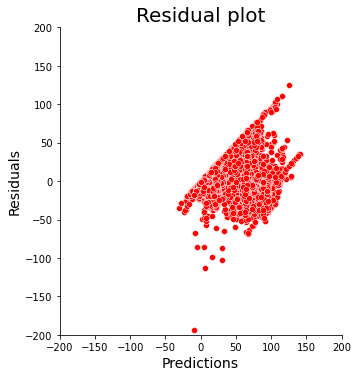

In [41]:
rezdf_lasso = df
rezdf_lasso['preds'] = lasso_preds
rezdf_lasso['resids'] = (rezdf_lasso['preds'] - y)

# residual plot
fig = plt.figure(figsize = (12, 8))
sns.relplot(x='preds', y='resids', data=rezdf_lasso, color='red')
plt.title('Residual plot', size=20)
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.xlabel('Predictions', size=14)
plt.ylabel('Residuals', size=14);

(-200.0, 200.0)

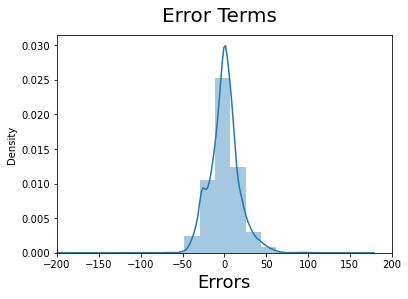

In [42]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(rezdf_lasso['resids'], bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.xlim([-200, 200])

In [43]:
# intercept and regression model coefficients
coef2_lasso = lasso.coef_.tolist()
coefdf2_lasso = pd.DataFrame(ind_columns_all, columns=['Variable'])
coefdf2_lasso['Coefficient'] = coef2_lasso

print('Intercept: \n', lasso.intercept_)
coefdf2_lasso

Intercept: 
 34.421219135352494


Variable  Coefficient
0       number_of_elements     0.000000
1         mean_atomic_mass    -0.000000
2     wtd_mean_atomic_mass    -0.117541
3        gmean_atomic_mass    -0.000000
4    wtd_gmean_atomic_mass    -0.000000
..                     ...          ...
162                     Pb     0.000000
163                     Bi     3.851411
164                     Po     0.000000
165                     At     0.000000
166                     Rn     0.000000

[167 rows x 2 columns]

#### Lasso Features with Coefficients

In [44]:
pd.set_option('display.max_rows', 150)

coeff= pd.DataFrame(coefdf2_lasso[coefdf2_lasso.Coefficient!=0])

coeff['Coefficient Absolute'] = coeff['Coefficient'].abs()
coeff.sort_values('Coefficient Absolute', ascending=False)

Variable  Coefficient  Coefficient Absolute
62      wtd_mean_ThermalConductivity    10.603133             10.603133
64     wtd_gmean_ThermalConductivity    -8.911775              8.911775
136                               Ba     8.757244              8.757244
7                  range_atomic_mass     5.437564              5.437564
80                   wtd_std_Valence    -4.053058              4.053058
163                               Bi     3.851411              3.851411
10               wtd_std_atomic_mass    -3.343854              3.343854
94                                Si    -3.238540              3.238540
44        wtd_gmean_ElectronAffinity    -2.960786              2.960786
6            wtd_entropy_atomic_mass     2.960010              2.960010
70       wtd_std_ThermalConductivity     2.754461              2.754461
46      wtd_entropy_ElectronAffinity    -2.750278              2.750278
66   wtd_entropy_ThermalConductivity     2.658724              2.658724
100                               Ca     2.564098              2.564098
33                     gmean_Density    -1.821968              1.821968
27               range_atomic_radius     1.814414              1.814414
11                          mean_fie     1.598674              1.598674
160                               Hg     1.453957              1.453957
60                wtd_std_FusionHeat    -1.444920              1.444920
161                               Tl     1.118754              1.118754
113                               As    -1.048332              1.048332
8              wtd_range_atomic_mass    -1.022679              1.022679
127                               Ag    -0.990668              0.990668
96                                 S    -0.967576              0.967576
97                                Cl    -0.865930              0.865930
56            wtd_entropy_FusionHeat     0.730239              0.730239
49              std_ElectronAffinity     0.723023              0.723023
118                               Sr     0.665290              0.665290
138                               Ce    -0.650766              0.650766
140                               Nd    -0.612786              0.612786
112                               Ge    -0.605506              0.605506
31                      mean_Density    -0.359760              0.359760
38                 wtd_range_Density     0.354665              0.354665
143                               Eu    -0.323738              0.323738
93                                Al    -0.299284              0.299284
121                               Nb     0.289820              0.289820
117                               Rb     0.262275              0.262275
78                 wtd_range_Valence     0.238612              0.238612
84                                Be    -0.225422              0.225422
83                                Li     0.224590              0.224590
87                                 N    -0.215999              0.215999
137                               La    -0.215895              0.215895
114                               Se    -0.189324              0.189324
95                                 P    -0.167144              0.167144
40                   wtd_std_Density    -0.165014              0.165014
151                               Lu     0.163652              0.163652
86                                 C     0.159113              0.159113
144                               Gd    -0.152539              0.152539
107                               Co    -0.133933              0.133933
54              wtd_gmean_FusionHeat     0.133314              0.133314
108                               Ni    -0.124371              0.124371
35                   entropy_Density    -0.121573              0.121573
103                                V     0.121085              0.121085
2               wtd_mean_atomic_mass    -0.117541              0.117541
102                               Ti    -0.088072              0.088

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached

In [45]:
# Instance of Recursive Feature Elimination
rfe = RFE(estimator=lasso_reg_best, n_features_to_select=10, step=1)

# Fit RFE
rfe.fit(X_all_scaled, y_all)

RFE(estimator=Lasso(alpha=0.3), n_features_to_select=10)

In [46]:
# get column names
columns = pd.DataFrame(list(ind_columns_all))

# Get the ranking of features
ranking = pd.DataFrame(rfe.ranking_)

# ranking and their importance
rfe_selected = pd.DataFrame()
rfe_selected  = pd.concat([columns, ranking], axis=1)
rfe_selected.columns = ['Feature Name', 'Ranking']
rfe_selected_sorted = rfe_selected.sort_values(by=['Ranking'], ascending=True)
print(rfe_selected_sorted)

                        Feature Name  Ranking
163                               Bi        1
62      wtd_mean_ThermalConductivity        1
33                     gmean_Density        1
64     wtd_gmean_ThermalConductivity        1
66   wtd_entropy_ThermalConductivity        1
..                               ...      ...
164                               Po      154
165                               At      155
166                               Rn      156
1                   mean_atomic_mass      157
0                 number_of_elements      158

[167 rows x 2 columns]


In [47]:
# Top 10 features
df_top_10 = rfe_selected_sorted[(rfe_selected_sorted["Ranking"] < 11)]
df_top_10

Feature Name  Ranking
163                               Bi        1
62      wtd_mean_ThermalConductivity        1
33                     gmean_Density        1
64     wtd_gmean_ThermalConductivity        1
66   wtd_entropy_ThermalConductivity        1
80                   wtd_std_Valence        1
7                  range_atomic_mass        1
136                               Ba        1
10               wtd_std_atomic_mass        1
46      wtd_entropy_ElectronAffinity        1
6            wtd_entropy_atomic_mass        2
94                                Si        3
44        wtd_gmean_ElectronAffinity        4
100                               Ca        5
70       wtd_std_ThermalConductivity        6
11                          mean_fie        7
27               range_atomic_radius        8
60                wtd_std_FusionHeat        9
113                               As       10

Text(0, 0.5, 'Feature Names')

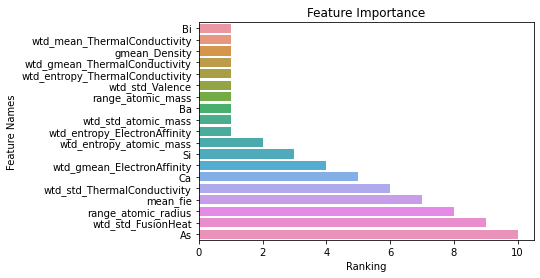

In [48]:
# Visulization of important features 
ax = sns.barplot(x ='Ranking', y = 'Feature Name',data=df_top_10, orient= 'h')
ax.set_title("Feature Importance")
ax.set_xlabel("Ranking")
ax.set_ylabel("Feature Names")

#### Ridge Regression

#### Method - 1 (Dataset with all variables)

In [49]:
# hyperparameter tuning with grid search
ridge_reg_all = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 200, 500, 1000]}

grid_search_ridge_all = GridSearchCV(estimator=ridge_reg_all, param_grid=param_grid, n_jobs=-1, cv=cv, 
                           scoring='neg_root_mean_squared_error')

In [50]:
%%time
grid_result_ridge_all = grid_search_ridge_all.fit(X_all_scaled, y_all)
# summarize results
print("Best: %f using %s" % (grid_result_ridge_all.best_score_, grid_result_ridge_all.best_params_))
means_all = grid_result_ridge_all.cv_results_['mean_test_score']
stds_all = grid_result_ridge_all.cv_results_['std_test_score']
params_all = grid_result_ridge_all.cv_results_['params']
for mean, stdev, param in zip(means_all, stds_all, params_all):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -17.897377 using {'alpha': 1000}
-22.567645 (12.428285) with: {'alpha': 0.001}
-22.565251 (12.421771) with: {'alpha': 0.01}
-22.542670 (12.360181) with: {'alpha': 0.1}
-22.391410 (11.947036) with: {'alpha': 1}
-21.836797 (10.594398) with: {'alpha': 10}
-19.851100 (6.203182) with: {'alpha': 100}
-19.006787 (4.275562) with: {'alpha': 200}
-18.166797 (2.089707) with: {'alpha': 500}
-17.897377 (1.037348) with: {'alpha': 1000}
Wall time: 3.34 s


#### Method - 2 (Reduced dataset)

In [51]:
# hyperparameter tuning with grid search
ridge_reg = Ridge()

grid_search_ridge = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, n_jobs=-1, cv=cv, 
                           scoring='neg_root_mean_squared_error')

In [52]:
%%time
grid_result_ridge = grid_search_ridge.fit(X_scaled, y)
# summarize results
print("Best: %f using %s" % (grid_result_ridge.best_score_, grid_result_ridge.best_params_))
means = grid_result_ridge.cv_results_['mean_test_score']
stds = grid_result_ridge.cv_results_['std_test_score']
params = grid_result_ridge.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.214993 using {'alpha': 1000}
-22.679788 (10.941132) with: {'alpha': 0.001}
-22.679199 (10.940006) with: {'alpha': 0.01}
-22.673323 (10.928771) with: {'alpha': 0.1}
-22.615849 (10.818889) with: {'alpha': 1}
-22.138575 (9.907089) with: {'alpha': 10}
-20.123965 (6.006532) with: {'alpha': 100}
-19.295693 (4.250282) with: {'alpha': 200}
-18.476290 (2.152504) with: {'alpha': 500}
-18.214993 (1.092863) with: {'alpha': 1000}
Wall time: 2.48 s


With respect to RMSE, Ridge regression model with all variables is better than reduced variables at alpha of 1000

In [53]:
ridge_reg_best = Ridge(alpha = 1000)

# Lasso Regression Model
ridge = ridge_reg_best.fit(X_all_scaled, y_all)
# score the regression model based on Root Mean Squared Error
ridge_preds = cross_val_predict(ridge, X_all_scaled, y_all, cv=cv)
ridge_scores = cross_val_score(ridge, X_all_scaled, y_all, scoring='neg_root_mean_squared_error', cv=cv)
print('Average of RMSE for 10 folds: ', np.mean(ridge_scores))
print('Standard Deviation of RMSE for 10 folds: ', np.std(ridge_scores))

Average of RMSE for 10 folds:  -17.897376751849187
Standard Deviation of RMSE for 10 folds:  1.037348231646988


In [54]:
ridge_scores

array([-17.20146094, -17.76609165, -17.70643718, -17.55575516,
       -17.52395924, -18.28908214, -17.33259556, -17.65596932,
       -17.0831061 , -20.85931023])

<Figure size 864x576 with 0 Axes>

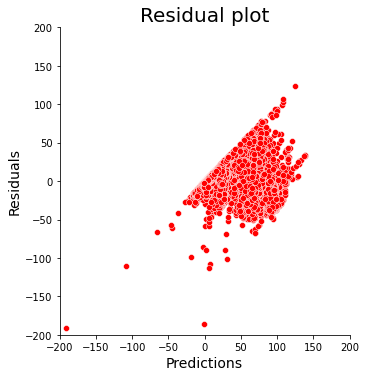

In [55]:
rezdf_ridge = df
rezdf_ridge['preds'] = ridge_preds
rezdf_ridge['resids'] = (rezdf_ridge['preds'] - y_all)

# residual plot
fig = plt.figure(figsize = (12, 8))
sns.relplot(x='preds', y='resids', data=rezdf_ridge, color='red')
plt.title('Residual plot', size=20)
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.xlabel('Predictions', size=14)
plt.ylabel('Residuals', size=14);

(-200.0, 200.0)

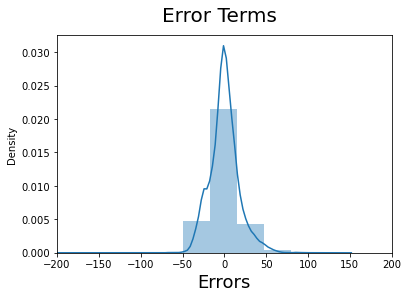

In [56]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(rezdf_ridge['resids'], bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.xlim([-200, 200])

In [57]:
# intercept and regression model coefficients
coef2_ridge = ridge.coef_.tolist()
coefdf2_ridge = pd.DataFrame(ind_columns_all, columns=['Variable'])
coefdf2_ridge['Coefficient'] = coef2_ridge

print('Intercept: \n', ridge.intercept_)
coefdf2_ridge

Intercept: 
 34.42121913535249


Variable  Coefficient
0       number_of_elements     1.662024
1         mean_atomic_mass     1.530949
2     wtd_mean_atomic_mass    -2.061641
3        gmean_atomic_mass     0.765496
4    wtd_gmean_atomic_mass    -0.383023
..                     ...          ...
162                     Pb     0.329784
163                     Bi     3.752301
164                     Po     0.000000
165                     At     0.000000
166                     Rn     0.000000

[167 rows x 2 columns]

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached

In [58]:
# Instance of Recursive Feature Elimination
rfe = RFE(estimator=ridge_reg_best, n_features_to_select=5, step=1)

# Fit RFE
rfe.fit(X_all_scaled, y_all)

RFE(estimator=Ridge(alpha=1000), n_features_to_select=5)

In [59]:
# get column names
columns = pd.DataFrame(list(ind_columns_all))

# Get the ranking of features
ranking = pd.DataFrame(rfe.ranking_)

# ranking and their importance
rfe_selected = pd.DataFrame()
rfe_selected  = pd.concat([columns, ranking], axis=1)
rfe_selected.columns = ['Feature Name', 'Ranking']
rfe_selected_sorted = rfe_selected.sort_values(by=['Ranking'], ascending=True)
print(rfe_selected_sorted)

                      Feature Name  Ranking
136                             Ba        1
62    wtd_mean_ThermalConductivity        1
64   wtd_gmean_ThermalConductivity        1
10             wtd_std_atomic_mass        1
7                range_atomic_mass        1
..                             ...      ...
141                             Pm      159
164                             Po      160
165                             At      161
82                              He      162
166                             Rn      163

[167 rows x 2 columns]


In [60]:
# Top 5 features
df_top_10 = rfe_selected_sorted[(rfe_selected_sorted["Ranking"] < 11)]
df_top_10

Feature Name  Ranking
136                               Ba        1
62      wtd_mean_ThermalConductivity        1
64     wtd_gmean_ThermalConductivity        1
10               wtd_std_atomic_mass        1
7                  range_atomic_mass        1
70       wtd_std_ThermalConductivity        2
44        wtd_gmean_ElectronAffinity        3
0                 number_of_elements        4
35                   entropy_Density        5
6            wtd_entropy_atomic_mass        6
80                   wtd_std_Valence        7
163                               Bi        8
27               range_atomic_radius        9
66   wtd_entropy_ThermalConductivity       10

Text(0, 0.5, 'Feature Names')

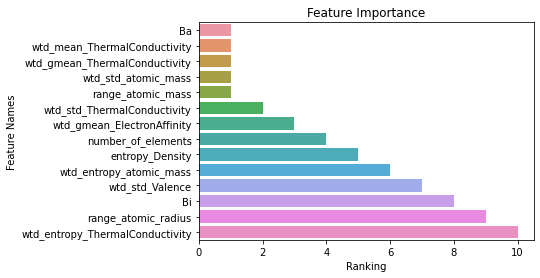

In [61]:
# Visulization of important features 
ax = sns.barplot(x ='Ranking', y = 'Feature Name',data=df_top_10, orient= 'h')
ax.set_title("Feature Importance")
ax.set_xlabel("Ranking")
ax.set_ylabel("Feature Names")

#### ElasticNet Regression

#### Method - 1 (Dataset with all variables)

In [62]:
# ElasticNet Regression Model
elastic_net_all = linear_model.ElasticNet().fit(X_all_scaled, y_all)
# score the regression model based on Root Mean Squared Error
elastic_net_preds_all = cross_val_predict(elastic_net_all, X_all_scaled, y_all, cv=cv)
elastic_net_scores_all = cross_val_score(elastic_net_all, X_all_scaled, y_all, scoring='neg_root_mean_squared_error', cv=cv)
print('Average of RMSE for 10 folds: ', np.mean(elastic_net_scores_all))
print('Standard Deviation of RMSE for 10 folds: ', np.std(elastic_net_scores_all))

Average of RMSE for 10 folds:  -19.463285824164597
Standard Deviation of RMSE for 10 folds:  0.2705539932896067


In [63]:
elastic_net_scores_all

array([-19.41353864, -19.85481209, -19.90531346, -19.51629704,
       -19.32952465, -19.65027818, -19.10810117, -19.41211302,
       -19.02217056, -19.42070943])

#### Method - 2 (Reduced dataset)

In [64]:
# ElasticNet Regression Model
elastic_net = linear_model.ElasticNet().fit(X_scaled, y)
# score the regression model based on Root Mean Squared Error
elastic_net_preds = cross_val_predict(elastic_net, X_scaled, y, cv=cv)
elastic_net_scores = cross_val_score(elastic_net, X_scaled, y, scoring='neg_root_mean_squared_error', cv=cv)
print('Average of RMSE for 10 folds: ', np.mean(elastic_net_scores))
print('Standard Deviation of RMSE for 10 folds: ', np.std(elastic_net_scores))

Average of RMSE for 10 folds:  -19.670809400897863
Standard Deviation of RMSE for 10 folds:  0.2943780608568159


In [65]:
elastic_net_scores

array([-19.62085556, -20.04501339, -20.18080974, -19.76583607,
       -19.55486832, -19.85011789, -19.28952289, -19.6022496 ,
       -19.1628291 , -19.63599143])

With respect to RMSE, ElasticNet regression model with all variables is better than reduced variables

<Figure size 864x576 with 0 Axes>

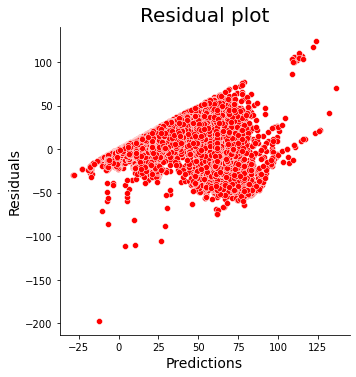

In [66]:
rezdf_elastic_net = df_all
rezdf_elastic_net['preds'] = elastic_net_preds_all
rezdf_elastic_net['resids'] = (rezdf_elastic_net['preds'] - y)

# residual plot
fig = plt.figure(figsize = (12, 8))
sns.relplot(x='preds', y='resids', data=rezdf_elastic_net, color='red')
plt.title('Residual plot', size=20)
plt.xlabel('Predictions', size=14)
plt.ylabel('Residuals', size=14);

Text(0.5, 0, 'Errors')

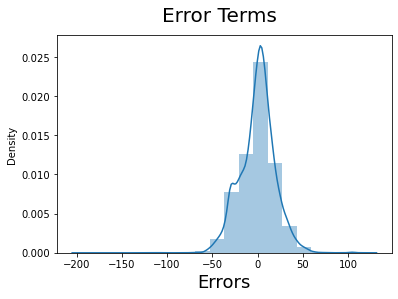

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(rezdf_elastic_net['resids'], bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [68]:
# intercept and regression model coefficients
coef2_elastic_net = elastic_net_all.coef_.tolist()
coefdf2_elastic_net = pd.DataFrame(ind_columns_all, columns=['Variable'])
coefdf2_elastic_net['Coefficient'] = coef2_elastic_net

print('Intercept: \n', elastic_net.intercept_)

Intercept: 
 34.42121913535249


In [69]:
pd.set_option('display.max_rows', 170)
print(coefdf2_elastic_net)

                            Variable  Coefficient
0                 number_of_elements     0.984486
1                   mean_atomic_mass    -0.000000
2               wtd_mean_atomic_mass    -0.000000
3                  gmean_atomic_mass    -0.000000
4              wtd_gmean_atomic_mass    -0.000000
5                entropy_atomic_mass     0.000000
6            wtd_entropy_atomic_mass     1.588463
7                  range_atomic_mass     1.154617
8              wtd_range_atomic_mass    -0.845391
9                    std_atomic_mass     0.422909
10               wtd_std_atomic_mass    -0.000000
11                          mean_fie     0.289722
12                      wtd_mean_fie     0.000000
13                         gmean_fie     0.092132
14                     wtd_gmean_fie    -0.000000
15                       entropy_fie     0.053338
16                   wtd_entropy_fie     0.604340
17                         range_fie     0.933960
18                     wtd_range_fie    -0.000000


Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [70]:
# Instance of Recursive Feature Elimination
rfe = RFE(estimator=elastic_net_all, n_features_to_select=10, step=1)

# Fit RFE
rfe.fit(X_all_scaled, y_all)

RFE(estimator=ElasticNet(), n_features_to_select=10)

In [71]:
# get column names
columns = pd.DataFrame(list(ind_columns_all))

# Get the ranking of features
ranking = pd.DataFrame(rfe.ranking_)

# ranking and their importance
rfe_selected = pd.DataFrame()
rfe_selected  = pd.concat([columns, ranking], axis=1)
rfe_selected.columns = ['Feature Name', 'Ranking']
rfe_selected_sorted = rfe_selected.sort_values(by=['Ranking'], ascending=True)
print(rfe_selected_sorted)

                        Feature Name  Ranking
163                               Bi        1
17                         range_fie        1
44        wtd_gmean_ElectronAffinity        1
67         range_ThermalConductivity        1
70       wtd_std_ThermalConductivity        1
80                   wtd_std_Valence        1
27               range_atomic_radius        1
100                               Ca        1
136                               Ba        1
6            wtd_entropy_atomic_mass        1
62      wtd_mean_ThermalConductivity        2
88                                 O        3
64     wtd_gmean_ThermalConductivity        4
56            wtd_entropy_FusionHeat        5
68     wtd_range_ThermalConductivity        6
160                               Hg        7
33                     gmean_Density        8
43            gmean_ElectronAffinity        9
7                  range_atomic_mass       10
94                                Si       11
69           std_ThermalConductivi

In [72]:
df_top_10 = rfe_selected_sorted[(rfe_selected_sorted["Ranking"] < 11)]
df_top_10

Feature Name  Ranking
163                             Bi        1
17                       range_fie        1
44      wtd_gmean_ElectronAffinity        1
67       range_ThermalConductivity        1
70     wtd_std_ThermalConductivity        1
80                 wtd_std_Valence        1
27             range_atomic_radius        1
100                             Ca        1
136                             Ba        1
6          wtd_entropy_atomic_mass        1
62    wtd_mean_ThermalConductivity        2
88                               O        3
64   wtd_gmean_ThermalConductivity        4
56          wtd_entropy_FusionHeat        5
68   wtd_range_ThermalConductivity        6
160                             Hg        7
33                   gmean_Density        8
43          gmean_ElectronAffinity        9
7                range_atomic_mass       10

Text(0, 0.5, 'Feature Names')

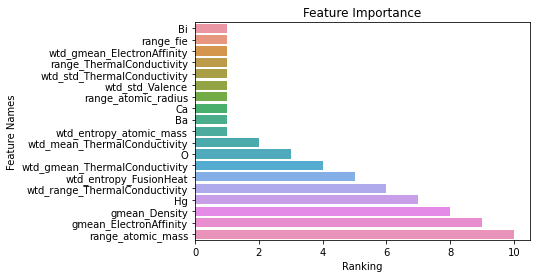

In [73]:
# Visulization of important features 
ax = sns.barplot(x ='Ranking', y = 'Feature Name',data=df_top_10, orient= 'h')
ax.set_title("Feature Importance")
ax.set_xlabel("Ranking")
ax.set_ylabel("Feature Names")